# Shelter Animal Outcomes

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
os.chdir(r'C:\Users\brcro\OneDrive\Documents\Syracuse\IST 652 - Scripting for Data Analysis\Project')
#os.chdir(r'C:\Users\Brandon Croarkin\Documents\Education\Syracuse\Scripting')

## Read in Data and Basic EDA 

In [175]:
#Austin Employment Data
pop = pd.ExcelFile('AustinEmployment.xlsx')
# Print the sheet names
print(pop.sheet_names)

['BLS Data Series']


In [176]:
pop_df = pd.DataFrame(pop.parse('BLS Data Series', skiprows = 12))
pop_df.set_index('Year', inplace = True)
pop_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2008,788.8,792.1,790.5,790.3,790.1,789.9,791.4,792.8,794.3,791.9,791.3,789.4
2009,784.9,781.2,777.3,775.4,774.7,772.4,771.9,771.0,769.9,769.7,770.3,771.1
2010,775.2,776.4,780.8,780.6,783.2,785.0,786.1,787.3,787.7,793.3,795.1,797.6
2011,799.4,802.2,805.0,809.7,808.9,810.8,812.9,816.1,819.3,817.6,820.2,824.4
2012,829.5,830.1,833.2,835.3,837.6,842.0,843.6,848.4,852.3,856.1,859.8,863.5


In [177]:
years = []
months = []
data = []
for year in pop_df.index:
    for col in pop_df.columns:
        years.append(year)
        months.append(col)
        data.append(pop_df.loc[year][col])
        #years.append(int(pop_df.iloc[i][0]))
df = pd.DataFrame({'Year': years, 
                   'Month': months,
                  'Employment': data})    
df.head()

,Employment,Month,Year
0,788.8,Jan,2008
1,792.1,Feb,2008
2,790.5,Mar,2008
3,790.3,Apr,2008
4,790.1,May,2008


In [178]:
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['Month'] = df['Month'].map(month_mapping)

In [234]:
#Shelter Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [202]:
train.shape

(26729, 10)

In [203]:
train = train.set_index('AnimalID')
train.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
AnimalID,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [204]:
train.columns

Index(['Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype', 'AnimalType',
       'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

In [205]:
train[train.OutcomeType == 'Transfer']['OutcomeSubtype'].value_counts()

Partner    7816
SCRP       1599
Barn          1
Name: OutcomeSubtype, dtype: int64

In [206]:
train[train.OutcomeType == 'Euthanasia']['OutcomeSubtype'].value_counts()

Suffering              1002
Aggressive              320
Behavior                 86
Rabies Risk              74
Medical                  66
Court/Investigation       6
Name: OutcomeSubtype, dtype: int64

In [207]:
train[train.OutcomeType == 'Return_to_owner']['OutcomeSubtype'].value_counts()

Series([], Name: OutcomeSubtype, dtype: int64)

In [208]:
train[train.OutcomeType == 'Adoption']['OutcomeSubtype'].value_counts()

Foster     1800
Offsite     165
Barn          1
Name: OutcomeSubtype, dtype: int64

In [209]:
train[train.OutcomeType == 'Died']['OutcomeSubtype'].value_counts()

In Kennel     114
In Foster      52
Enroute         8
At Vet          4
In Surgery      3
Name: OutcomeSubtype, dtype: int64

In [210]:
print(np.min(train.DateTime), np.max(train.DateTime))

2013-10-01 09:31:00 2016-02-21 19:17:00


In [211]:
colors = train.Color.value_counts()
colors[:25]

Black/White            2824
Black                  2292
Brown Tabby            1635
Brown Tabby/White       940
White                   931
Brown/White             884
Orange Tabby            841
Tan/White               773
Tricolor                752
Blue/White              702
Black/Tan               672
White/Black             643
Brown                   639
Tan                     628
White/Brown             569
Tortie                  530
Calico                  517
Orange Tabby/White      455
Brown Brindle/White     450
Blue                    450
Black/Brown             436
Blue Tabby              433
White/Tan               389
Red                     337
Torbie                  335
Name: Color, dtype: int64

In [212]:
train['SexuponOutcome'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown', nan], dtype=object)

In [213]:
train['AgeuponOutcome'].unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years',
       nan, '17 years', '18 years', '19 years', '20 years'], dtype=object)

In [214]:
train['OutcomeType'].value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [18]:
train.describe()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,6374,22918,5,16,2,5,44,1380,366
top,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,136,19,10769,7816,15595,9779,3969,8810,2824


## Clean Data 

In [19]:
train.dtypes

Name              object
DateTime          object
OutcomeType       object
OutcomeSubtype    object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
Color             object
dtype: object

In [220]:
#Find Missing Values
train.isna().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [224]:
#Remove missing values 
train = train.dropna(subset = ['AgeuponOutcome'])
train = train.dropna(subset = ['SexuponOutcome'])
train.isna().sum()

AnimalID              0
Name               7673
DateTime              0
OutcomeType           0
OutcomeSubtype    13611
AnimalType            0
SexuponOutcome        0
AgeuponOutcome        0
Breed                 0
Color                 0
dtype: int64

In [226]:
#Remove unneeded columns (AnimalID and Name)
train.drop(['AnimalID', 'Name'], axis=1, inplace=True)

In [22]:
#Change data types
train['OutcomeType'] = train['OutcomeType'].astype('category')
train['OutcomeSubtype'] = train['OutcomeSubtype'].astype('category')
train['AnimalType'] = train['AnimalType'].astype('category')
train['Breed'] = train['Breed'].astype('category')
train['DateTime'] = pd.to_datetime(train['DateTime'])

In [23]:
train.dtypes

Name                      object
DateTime          datetime64[ns]
OutcomeType             category
OutcomeSubtype          category
AnimalType              category
SexuponOutcome            object
AgeuponOutcome            object
Breed                   category
Color                     object
dtype: object

## Feature Engineering

In [236]:
Neutered = []
Gender = []
for val in train['SexuponOutcome']:
    neutered, gender = NG_split(val)
    Neutered.append(neutered)
    Gender.append(gender)
train['Neutered'] = Neutered
#convert spayed to neutered to track together
neuter_mapping = {'Neutered': 'Neutered', 'Spayed': 'Neutered', 'Intact': 'Intact', None: None}
train['Neutered'] = train['Neutered'].map(neuter_mapping)
train['Gender'] = Gender
train = train.drop('SexuponOutcome', 1)
train.head()

ValueError: not enough values to unpack (expected 2, got 1)

In [229]:
def agetodays(x):
        try:
            if x == 'Unknown':
                return None
            else:
                y = x.split()
        except:
            return None 
        if 'year' in y[1]:
            return float(y[0]) * 365
        elif 'month' in y[1]:
            return float(y[0]) * (365/12)
        elif 'week' in y[1]:
            return float(y[0]) * 7
        elif 'day' in y[1]:
            return float(y[0])
        
train['Age'] = train['AgeuponOutcome'].map(agetodays)
train.drop('AgeuponOutcome', axis = 'columns', inplace = True)
train.head()

,DateTime,OutcomeType,OutcomeSubtype,AnimalType,Breed,Color,Neutered,Gender,Age
0,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Shetland Sheepdog Mix,Brown/White,Neutered,Male,365.0
1,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Domestic Shorthair Mix,Cream Tabby,Neutered,Female,365.0
2,2015-01-31 12:28:00,Adoption,Foster,Dog,Pit Bull Mix,Blue/White,Neutered,Male,730.0
3,2014-07-11 19:09:00,Transfer,Partner,Cat,Domestic Shorthair Mix,Blue Cream,Intact,Male,21.0
4,2013-11-15 12:52:00,Transfer,Partner,Dog,Lhasa Apso/Miniature Poodle,Tan,Neutered,Male,730.0


In [230]:
#Drop Missing Age values
train = train.dropna(subset=['Age'])
train.isna().sum()

DateTime              0
OutcomeType           0
OutcomeSubtype    13611
AnimalType            0
Breed                 0
Color                 0
Neutered           1089
Gender             1089
Age                   0
dtype: int64

In [231]:
train[train.Gender.isna() == True]

,DateTime,OutcomeType,OutcomeSubtype,AnimalType,Breed,Color,Neutered,Gender,Age
7,2015-04-30 17:02:00,Transfer,Partner,Cat,Domestic Shorthair Mix,Brown Tabby,None,None,21.000000
10,2013-12-05 15:50:00,Transfer,SCRP,Cat,Domestic Shorthair Mix,Black,None,None,730.000000
64,2014-07-17 17:31:00,Transfer,Partner,Cat,Domestic Shorthair Mix,Black,None,None,14.000000
68,2015-06-16 09:00:00,Transfer,SCRP,Cat,Domestic Shorthair Mix,Brown Tabby/White,None,None,60.833333
81,2015-09-22 12:10:00,Euthanasia,Suffering,Cat,Domestic Shorthair Mix,Blue Tabby,None,None,14.000000
82,2015-05-30 18:56:00,Transfer,Partner,Cat,Siamese Mix,Seal Point,None,None,28.000000
103,2015-07-26 14:40:00,Transfer,Partner,Cat,Domestic Shorthair Mix,Black,None,None,14.000000
138,2015-10-20 09:00:00,Transfer,SCRP,Cat,Domestic Shorthair Mix,Tortie,None,None,91.250000
200,2014-01-21 15:20:00,Transfer,SCRP,Cat,Domestic Longhair Mix,Black,None,None,365.000000
268,2015-08-22 15:44:00,Transfer,Partner,Cat,Domestic Shorthair Mix,Brown Tabby,None,None,7.000000


In [28]:
colors = train.Color.value_counts()
def colorCategories(color):
    if colors[color] < 50:
        color = 'Other'
    else:
        color = color
    return(color)

train['Color'] = train['Color'].map(colorCategories)
train.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,Breed,Color,Neutered,Gender,Age
AnimalID,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,Unknown,Dog,Shetland Sheepdog Mix,Brown/White,Neutered,Male,365.0
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Domestic Shorthair Mix,Cream Tabby,Neutered,Female,365.0
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Pit Bull Mix,Blue/White,Neutered,Male,730.0
A683430,Unknown,2014-07-11 19:09:00,Transfer,Partner,Cat,Domestic Shorthair Mix,Other,Intact,Male,21.0
A667013,Unknown,2013-11-15 12:52:00,Transfer,Partner,Dog,Lhasa Apso/Miniature Poodle,Tan,Neutered,Male,730.0


In [29]:
train['Year'] = train['DateTime'].dt.year
train['Month'] = train['DateTime'].dt.month
train['Day'] = train['DateTime'].dt.day
train.drop('DateTime', 1)

,Name,OutcomeType,OutcomeSubtype,AnimalType,Breed,Color,Neutered,Gender,Age,Year,Month,Day
AnimalID,,,,,,,,,,,,
A671945,Hambone,Return_to_owner,Unknown,Dog,Shetland Sheepdog Mix,Brown/White,Neutered,Male,365.000000,2014,2,12
A656520,Emily,Euthanasia,Suffering,Cat,Domestic Shorthair Mix,Cream Tabby,Neutered,Female,365.000000,2013,10,13
A686464,Pearce,Adoption,Foster,Dog,Pit Bull Mix,Blue/White,Neutered,Male,730.000000,2015,1,31
A683430,Unknown,Transfer,Partner,Cat,Domestic Shorthair Mix,Other,Intact,Male,21.000000,2014,7,11
A667013,Unknown,Transfer,Partner,Dog,Lhasa Apso/Miniature Poodle,Tan,Neutered,Male,730.000000,2013,11,15
A677334,Elsa,Transfer,Partner,Dog,Cairn Terrier/Chihuahua Shorthair,Black/Tan,Intact,Female,30.416667,2014,4,25
A699218,Jimmy,Transfer,Partner,Cat,Domestic Shorthair Mix,Blue Tabby,Intact,Male,21.000000,2015,3,28
A701489,Unknown,Transfer,Partner,Cat,Domestic Shorthair Mix,Brown Tabby,None,None,21.000000,2015,4,30
A671784,Lucy,Adoption,Unknown,Dog,American Pit Bull Terrier Mix,Red/White,Neutered,Female,152.083333,2014,2,4


In [30]:
#Merge with Austin Employment data
df_train = pd.merge(train, df)
df_train.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,Breed,Color,Neutered,Gender,Age,Year,Month,Day,Employment
0,Hambone,2014-02-12 18:22:00,Return_to_owner,Unknown,Dog,Shetland Sheepdog Mix,Brown/White,Neutered,Male,365.000000,2014,2,12,909.9
1,Lucy,2014-02-04 17:17:00,Adoption,Unknown,Dog,American Pit Bull Terrier Mix,Red/White,Neutered,Female,152.083333,2014,2,4,909.9
2,Myles,2014-02-11 18:16:00,Return_to_owner,Unknown,Dog,Beagle Mix,Tricolor,Neutered,Male,1825.000000,2014,2,11,909.9
3,Unknown,2014-02-16 19:38:00,Adoption,Offsite,Cat,Domestic Medium Hair Mix,Cream Tabby,Neutered,Male,304.166667,2014,2,16,909.9
4,Minnie,2014-02-10 12:34:00,Return_to_owner,Unknown,Dog,Dachshund Longhair,Brown,Neutered,Female,730.000000,2014,2,10,909.9


## EDA 

C:\Users\brcro\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


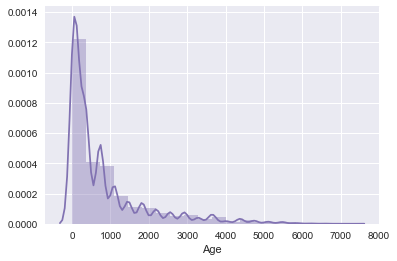

In [31]:
#Age distribution
sns.set(color_codes=True)
df_train['Age'] = df_train['Age'].astype(float)
sns.distplot(df_train['Age'], bins = 20, color = 'm')

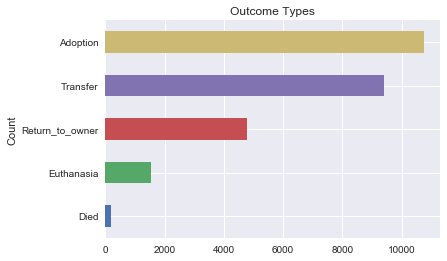

In [32]:
#Outcome Types
df_train['OutcomeType'].value_counts(ascending = True).plot(kind = 'barh')
plt.title('Outcome Types')
plt.ylabel('Count')
plt.show()

In [33]:
#Employment trends
employment = df_train[['DateTime', 'Employment']]
#employment.head()
#sns.regplot(x = 'DateTime', y = 'Employment', data = df_train)

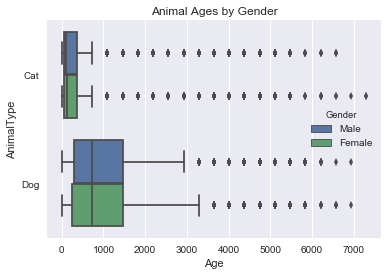

In [34]:
#Boxplot of Ages by Animal and gender
sns.boxplot(data=df_train,
         x='Age',
         y='AnimalType',
            hue = 'Gender')

plt.title('Animal Ages by Gender')
plt.show()

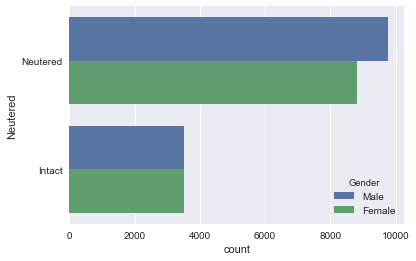

In [35]:
#Count plot of Neutered by Male and Female animals
sns.countplot(data = df_train,
             y = "Neutered",
             hue = "Gender")
plt.show()

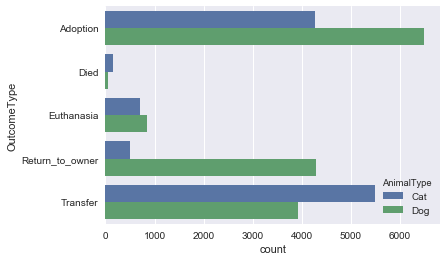

In [36]:
#Count plot of Neutered by Male and Female animals
sns.countplot(data = df_train,
             y = "OutcomeType",
             hue = "AnimalType")
plt.show()

In [37]:
#Make a pivot table for Outcome Types by month (can use random value for Values since just a count)
adoptions_df = pd.pivot_table(df_train, index = 'Month', columns = 'OutcomeType', values = 'Age', aggfunc = 'count')
adoptions_df

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
Month,,,,,
1,1045,12,117,507,653
2,819,10,107,412,507
3,571,11,108,336,472
4,500,7,101,379,702
5,686,18,130,367,893
6,830,27,161,332,969
7,1151,29,145,317,864
8,955,17,111,298,791
9,780,12,106,310,796


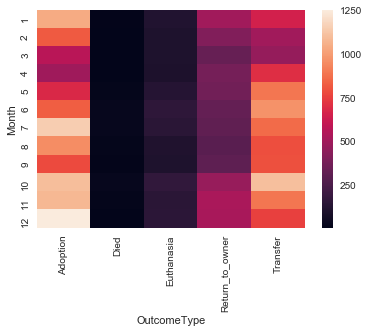

In [38]:
#Create a heatmap of the pivot table
sns.heatmap(adoptions_df)

In [112]:
#Make a pivot table for Outcome Types by month and year
adoptions_df2 = pd.pivot_table(df_train, index = ['Year','Month'], columns = 'OutcomeType', values = 'Age', aggfunc = 'count').dropna()
adoptions_df2

OutcomeType  Adoption  Died  Euthanasia  Return_to_owner  Transfer
Year Month                                                        
2013 10         359.0  12.0        73.0            149.0     381.0
     11         342.0   3.0        49.0            144.0     265.0
     12         427.0   1.0        61.0            141.0     295.0
2014 1          313.0   4.0        46.0            152.0     236.0
     2          261.0   3.0        43.0            139.0     205.0
     3          285.0   5.0        56.0            165.0     283.0
     4          270.0   4.0        48.0            188.0     341.0
     5          301.0   8.0        51.0            155.0     431.0
     6          378.0   9.0        72.0            158.0     442.0
     7          579.0  14.0        81.0            148.0     486.0
     8          497.0   5.0        64.0            142.0     398.0
     9          369.0   4.0        63.0            155.0     407.0
     10         382.0   2.0        63.0            141.0     351.0
     11         320.0   4.0        71.0            153.0     318.0
     12         403.0   7.0        66.0            184.0     250.0
2015 1          340.0   4.0        50.0            170.0     196.0
     2          287.0   3.0        49.0            153.0     186.0
     3          286.0   6.0        52.0            171.0     189.0
     4          230.0   3.0        53.0            191.0     361.0
     5          385.0  10.0        79.0            212.0     462.0
     6          452.0  18.0        89.0            174.0     527.0
     7          572.0  15.0        64.0            169.0     378.0
     8          458.0  12.0        47.0            156.0     393.0
     9          411.0   8.0        43.0            155.0     389.0
     10         360.0  13.0        35.0            184.0     376.0
     11         419.0  10.0        26.0            234.0     310.0
     12         420.0   2.0        23.0            198.0     213.0
2016 1          392.0   4.0        21.0            185.0     221.0
     2          271.0   4.0        15.0            120.0     116.0

In [113]:
#find row totals (gave me errors when I tried to add a column, so over-writing instead)
adoptions_df2['Adoption'] = adoptions_df2.sum(axis = 1)
adoptions_df2.drop(['Died', 'Euthanasia', 'Return_to_owner', 'Transfer'], axis = 1, inplace = True)
adoptions_df2 = adoptions_df2.rename(columns = {'Adoption': 'Total'})
adoptions_df2.reset_index(inplace = True)
adoptions_df2.head()

OutcomeType,Year,Month,Total
0,2013,10,974.0
1,2013,11,803.0
2,2013,12,925.0
3,2014,1,751.0
4,2014,2,651.0


In [160]:
df.reset_index(inplace = True)
df.head()

,index,Employment,Month,Year
0,0,788.8,1,2008
1,1,792.1,2,2008
2,2,790.5,3,2008
3,3,790.3,4,2008
4,4,790.1,5,2008


In [165]:
#merge with Austin Employment data
df_PopAdop = pd.merge(adoptions_df2, df,  how='left', left_on=['Year','Month'], right_on = ['Year','Month'])
df_PopAdop['Day'] = 1
df_PopAdop['DateTime'] = pd.to_datetime(df_PopAdop[['Year', 'Month', 'Day']])
df_PopAdop.drop(['Year', 'Month', 'Day', 'index'], axis = 1, inplace = True)
#df_PopAdop.set_index('DateTime', inplace = True)
df_PopAdop.head()

,Total,Employment,DateTime
0,974.0,894.8,2013-10-01
1,803.0,898.0,2013-11-01
2,925.0,901.8,2013-12-01
3,751.0,905.4,2014-01-01
4,651.0,909.9,2014-02-01


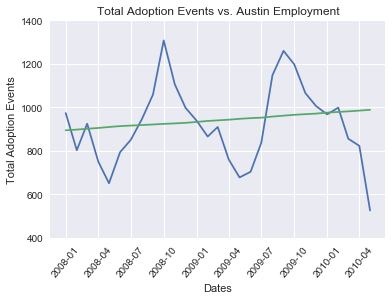

In [152]:
#Plot results
fig = plt.figure()
ax = plt.axes()
ax.set_ylim([400, 1400])
plt.xticks(rotation=50)
plt.title('Total Adoption Events vs. Austin Employment')
plt.xlabel('Dates')
plt.ylabel('Total Adoption Events')

plt.plot(df_PopAdop.DateTime, df_PopAdop.Total)
plt.plot(df_PopAdop.DateTime, df_PopAdop.Employment)

C:\Users\brcro\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


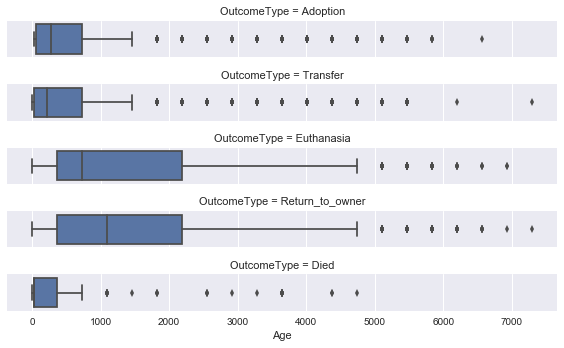

In [39]:
# Create FacetGrid with OutcomeType
g2 = sns.FacetGrid(df_train, 
                   row="OutcomeType",
                   row_order=['Adoption', 'Transfer', 'Euthanasia', 'Return_to_owner', 'Died'],
                   size = 1, 
                   aspect = 8 )

# Map a boxplot of Age onto the grid
g2.map(sns.boxplot, 'Age')

# Show the plot
plt.show()